# Semivariogram Models

Example code for using the module [svmodels.py](svmodels.py) to model semivariance. This simple library provides some standard and non-standard variogram functions, and some supporting scripts to handle experimental data.

In [1]:
import svmodels

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = [16 / 1.5, 10 / 1.5]   # inch / cm = 2.54
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

##  Empirical Semivariogram

The function <code>svmodels.get_empirical_semivariogram</code> creates an emprical semivariogram from X,Y coordinates and Z-Values (array-like).

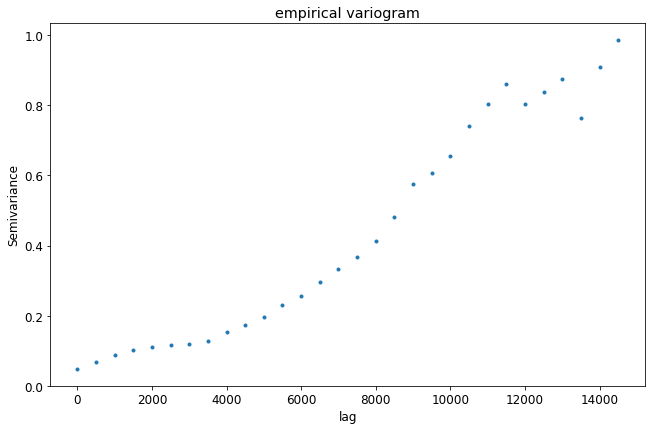

In [3]:
# example data with X,Y,Z
df = pd.read_excel("variogram_exampledata.xlsx")  

# create the semivariogram
exp_sv = svmodels.get_empirical_semivariogram(df.X, df.Y, df.Z,
                                    max_distance=15000,
                                    bandwidth=500)

# plot the result
plt.plot(exp_sv[0], exp_sv[1], '.', label="empirical semivariogram")
plt.title('empirical variogram')
plt.ylabel('Semivariance')
plt.xlabel('lag')
_ = plt.plot()

## Semivariogram Models

### Standard Models

A number of functions for modelling empirical variograms are provided through the module. 
The first argument is the lag distance $X$, which can be provided as a scalar or a vector.
For standard models, the range, sill and optionally the Nugget are provided.

In [4]:
svrange=14000
svsill=0.8
svnugget=0.05

# example for scalar input:
print("SV_Gaussian({}) = {}".format(100, svmodels.gaussian(100, svrange, svsill)))

SV_Gaussian(100) = 0.505696447063


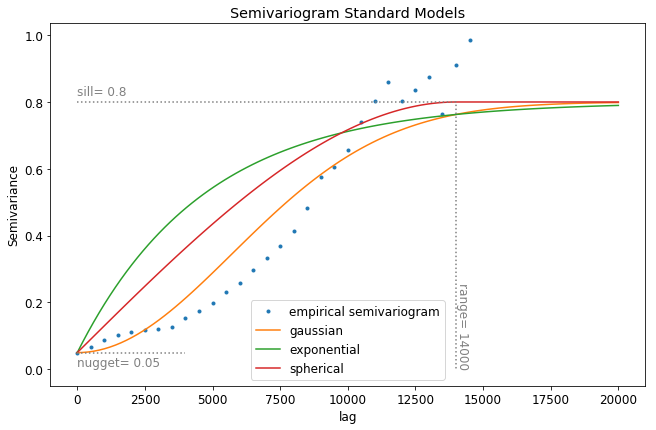

In [5]:
# example for vector input

plt.plot(exp_sv[0], exp_sv[1], '.', label="empirical semivariogram")

X = np.linspace(0, 20000, 100)

Y = svmodels.gaussian(X, svrange, svsill, svnugget)  
plt.plot(X, Y, label="gaussian")

Y = svmodels.exponential(X, svrange, svsill, svnugget)  
plt.plot(X, Y, label="exponential")

Y = svmodels.spherical(X, svrange, svsill, svnugget)  
plt.plot(X, Y, label="spherical")

plt.plot((0, svrange, svrange),(svsill, svsill, 0), ":", c="grey")
plt.plot((0, 4000),(svnugget, svnugget), ":", c="grey")

plt.text(0,svsill+0.02,"sill= {:}".format(svsill),color="grey")
plt.text(svrange,0,"range= {:}".format(svrange), rotation=270, verticalalignment='bottom',color="grey")
plt.text(0,svnugget-0.04,"nugget= {:}".format(svnugget),color="grey")



plt.legend()
plt.title('Semivariogram Standard Models')
plt.ylabel('Semivariance')
plt.xlabel('lag')

_ = plt.show()

### Periodic Semivariogram Functions
A number of non-standard functions are provided through the [svmodels.py](svmodels.py) module.

#### Hole-Effect Model
Useful for 1D interpolation.

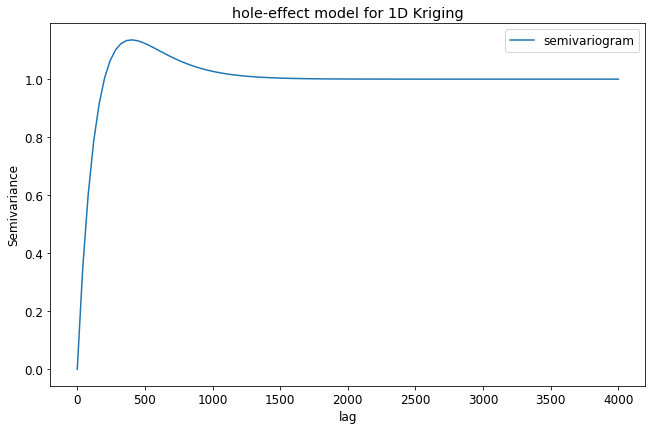

In [6]:
X = np.linspace(0,4000,100)
Y = svmodels.hole(X, 200, 1, 0.0)
plt.title('hole-effect model for 1D Kriging')
plt.ylabel('Semivariance')
plt.xlabel('lag')
plt.plot(X,Y, label="semivariogram")
plt.plot((0),(0))
plt.legend()
_ = plt.show()

#### Hole-Effect Model (2)
(Triki et al. p.1600 / Dowdall et al. 2003)

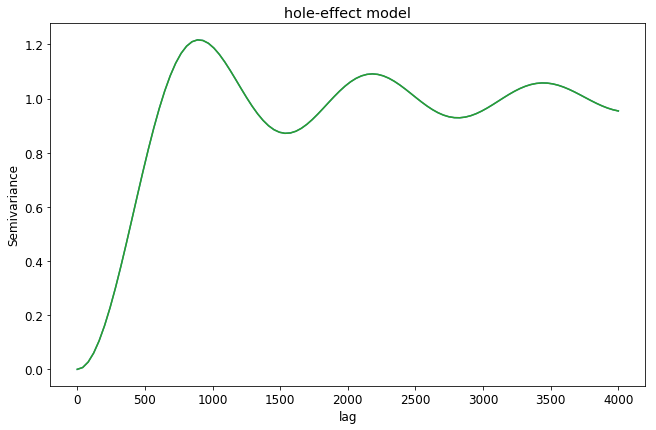

In [7]:
X = np.linspace(0,4000,100)
Y = svmodels.hole_N(X, 200, 1, 0.0)
plt.plot(X,Y)
plt.plot((0),(0))

plt.title('hole-effect model')
plt.ylabel('Semivariance')
plt.xlabel('lag')
plt.plot(X,Y)
plt.plot((0),(0))
_ = plt.show()

## Business Functions
### Instantiating Functions (freezing curve parameters)

The <code>instance_of()</code> function returns an instance of that semivariogram model with all parameters fixed. This is simply to allow for easier usage of that function in later coding.
This function is provided for convenience and is identical to using a lambda function

```python
mysvsmodel = lambda h, a=a, C0=C0: model( h )
```

mysvmodel(100) = 0.524090419121


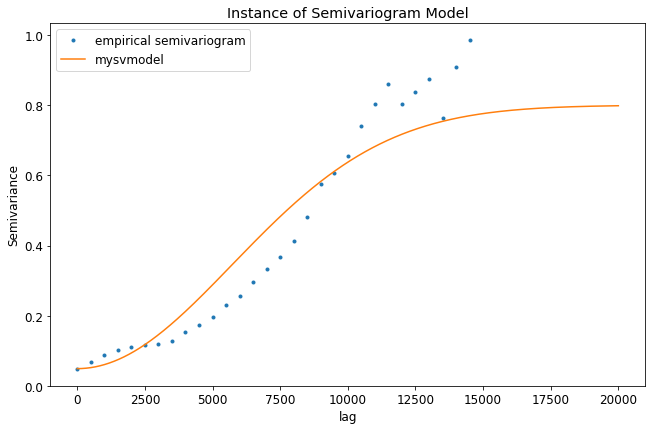

In [8]:
mysvmodel = svmodels.instance_of(svmodels.gaussian, a=svrange, C0=svsill, Cn=svnugget)
print("mysvmodel({}) = {}".format(100, mysvmodel(100)))

plt.title('Instance of Semivariogram Model')
plt.plot(exp_sv[0], exp_sv[1], '.', label="empirical semivariogram")
plt.plot(range(20000), mysvmodel(np.array(range(20000))), label="mysvmodel")
plt.ylabel('Semivariance')
plt.xlabel('lag')
plt.legend()
_ = plt.show()